# Histograms

A histogram is a bar chart which shows the frequency of a given phenomena (observation).  

 
A great example are probability distributions.  
Probability density function - y-axis holds the probability a given value would occur, and the x-axis is the value itself.  
  
We are able to plot a given probability distribution by sampling from it. Sampling means that we pick a number out of the distribution (e.g. rolling a die or pulling a single card out of a deck). And as we do this over and over again, we get a more accurate description of the distribution.


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

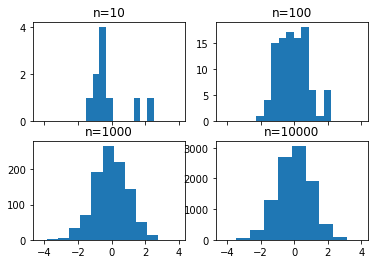

In [2]:
# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

By default, the histogram in matplotlib uses 10 bins, that is 10 different bars.  
Here we created a shared x-axis and as we sample more from the distribution, we're more likely to get outlier values further from our mean. Thus, 10 bins for n=10 is at best capturing 10 unique values, while for n=100000, many values have to be combined into a single bin.

Selecting the Number of Bins in a Histogram:  
http://users.stat.umn.edu/~gmeeden/papers/hist.pdf

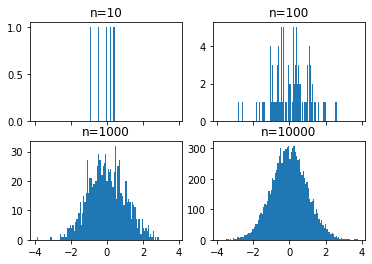

In [3]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

Previous example is a visual of the data at a coarse granularity, and this one - at a more fine grain granularity (?).

### GridSpec layout for subplots

The GridSpec allows you to map axes over multiple cells in a grid.  
  
For instance, let's create a scatter plot where the y values come from the normal distribution, and the x values come from a random distribution.  
It's not totally clear from looking at this plot what the actual distributions are for each axis, but we could add two smaller plots, each histograms, to make this a bit more clear.

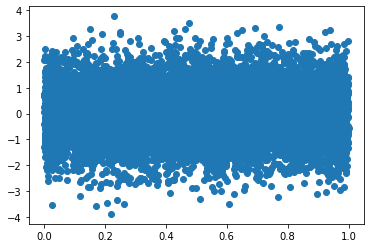

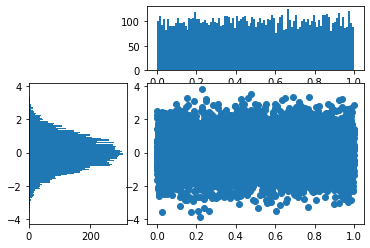

In [4]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)

# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])
# the GridSpec is indexed as rows and columns using the indexing operator.
# we create the first subplot (histogram) in row 0 position 1:, 
# side histogram in row 1 position 0 and original scatter plot in row 1 position 1:

lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

Since these are probability density histograms, we care only about the relative values.

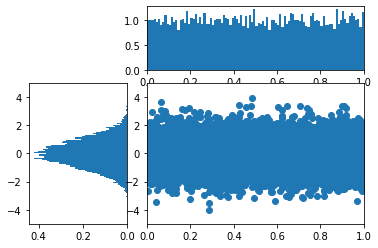

In [5]:
# # to clear axes object in %matplotlib notebook in order not create a new figure
# top_histogram.clear()

plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)

gspec = gridspec.GridSpec(3, 3)
top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

lower_right.scatter(X, Y)
# plot normed histograms
top_histogram.hist(X, bins=100, density=True)
side_histogram.hist(Y, bins=100, orientation='horizontal', density=True)
# `density` property was called `normed` in older versions of matplotlib
# it tells matplotlib to scale the frequency data in the histogram between 1 and 0

# flip the side histogram's x axis
side_histogram.invert_xaxis()

# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)